In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r WestIndies_2020

In [5]:
WestIndies_2020

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
15,15,FA Allen (WI),2,2,0,54,37,27.00,29,186.20,...,37,0,-,-,6.16,-,0,0,1,0
17,17,SW Ambris (WI),4,4,0,86,60,21.50,106,81.13,...,-,-,-,-,-,-,-,-,0,0
38,38,DM Bravo (WI),3,3,0,63,39,21.00,87,72.41,...,-,-,-,-,-,-,-,-,1,0
47,47,RL Chase (WI),5,5,1,82,41,20.50,104,78.84,...,208,4,2/53,52.00,4.95,63.0,0,0,3,0
51,51,SS Cottrell (WI),5,3,3,8,7*,-,9,88.88,...,284,10,4/67,28.40,5.79,29.4,1,0,1,0
71,71,WIA Fernando (SL),3,3,0,206,127,68.66,212,97.16,...,-,-,-,-,-,-,-,-,0,0
87,87,SO Hetmyer (WI),2,2,0,14,8,7.00,15,93.33,...,-,-,-,-,-,-,-,-,0,0
88,88,JO Holder (WI),3,3,0,23,12,7.66,24,95.83,...,171,3,2/68,57.00,6.10,56.0,0,0,0,0
90,90,SD Hope (WI),6,6,0,282,115,47.00,376,75.00,...,-,-,-,-,-,-,-,-,14,1
102,102,AS Joseph (WI),6,3,1,16,16,8.00,31,51.61,...,265,18,4/32,14.72,4.41,20.0,3,0,3,0


In [6]:
WestIndies_2020=WestIndies_2020.reset_index()

In [7]:
WestIndies_2020

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,15,15,FA Allen (WI),2,2,0,54,37,27.00,29,...,37,0,-,-,6.16,-,0,0,1,0
1,17,17,SW Ambris (WI),4,4,0,86,60,21.50,106,...,-,-,-,-,-,-,-,-,0,0
2,38,38,DM Bravo (WI),3,3,0,63,39,21.00,87,...,-,-,-,-,-,-,-,-,1,0
3,47,47,RL Chase (WI),5,5,1,82,41,20.50,104,...,208,4,2/53,52.00,4.95,63.0,0,0,3,0
4,51,51,SS Cottrell (WI),5,3,3,8,7*,-,9,...,284,10,4/67,28.40,5.79,29.4,1,0,1,0
5,71,71,WIA Fernando (SL),3,3,0,206,127,68.66,212,...,-,-,-,-,-,-,-,-,0,0
6,87,87,SO Hetmyer (WI),2,2,0,14,8,7.00,15,...,-,-,-,-,-,-,-,-,0,0
7,88,88,JO Holder (WI),3,3,0,23,12,7.66,24,...,171,3,2/68,57.00,6.10,56.0,0,0,0,0
8,90,90,SD Hope (WI),6,6,0,282,115,47.00,376,...,-,-,-,-,-,-,-,-,14,1
9,102,102,AS Joseph (WI),6,3,1,16,16,8.00,31,...,265,18,4/32,14.72,4.41,20.0,3,0,3,0


In [8]:
WestIndies_2020.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
WestIndies_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),2,2,0,54,37,27.00,29,186.20,0,...,37,0,-,-,6.16,-,0,0,1,0
1,SW Ambris (WI),4,4,0,86,60,21.50,106,81.13,0,...,-,-,-,-,-,-,-,-,0,0
2,DM Bravo (WI),3,3,0,63,39,21.00,87,72.41,0,...,-,-,-,-,-,-,-,-,1,0
3,RL Chase (WI),5,5,1,82,41,20.50,104,78.84,0,...,208,4,2/53,52.00,4.95,63.0,0,0,3,0
4,SS Cottrell (WI),5,3,3,8,7*,-,9,88.88,0,...,284,10,4/67,28.40,5.79,29.4,1,0,1,0
5,WIA Fernando (SL),3,3,0,206,127,68.66,212,97.16,1,...,-,-,-,-,-,-,-,-,0,0
6,SO Hetmyer (WI),2,2,0,14,8,7.00,15,93.33,0,...,-,-,-,-,-,-,-,-,0,0
7,JO Holder (WI),3,3,0,23,12,7.66,24,95.83,0,...,171,3,2/68,57.00,6.10,56.0,0,0,0,0
8,SD Hope (WI),6,6,0,282,115,47.00,376,75.00,1,...,-,-,-,-,-,-,-,-,14,1
9,AS Joseph (WI),6,3,1,16,16,8.00,31,51.61,0,...,265,18,4/32,14.72,4.41,20.0,3,0,3,0


In [10]:
WestIndies_2020_players =WestIndies_2020.copy()

In [11]:
WestIndies_2020_players.drop('Player',axis=1,inplace=True)

In [12]:
WestIndies_2020_players.HS=WestIndies_2020_players.HS.str.extract('(\d+)')
WestIndies_2020_players['HS'].fillna(value=0, inplace=True)


In [13]:
WestIndies_2020_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,2,2,0,54,37,27.00,29,186.20,0,0,...,37,0,-,-,6.16,-,0,0,1,0
1,4,4,0,86,60,21.50,106,81.13,0,1,...,-,-,-,-,-,-,-,-,0,0
2,3,3,0,63,39,21.00,87,72.41,0,0,...,-,-,-,-,-,-,-,-,1,0
3,5,5,1,82,41,20.50,104,78.84,0,0,...,208,4,2/53,52.00,4.95,63.0,0,0,3,0
4,5,3,3,8,7,-,9,88.88,0,0,...,284,10,4/67,28.40,5.79,29.4,1,0,1,0
5,3,3,0,206,127,68.66,212,97.16,1,1,...,-,-,-,-,-,-,-,-,0,0
6,2,2,0,14,8,7.00,15,93.33,0,0,...,-,-,-,-,-,-,-,-,0,0
7,3,3,0,23,12,7.66,24,95.83,0,0,...,171,3,2/68,57.00,6.10,56.0,0,0,0,0
8,6,6,0,282,115,47.00,376,75.00,1,2,...,-,-,-,-,-,-,-,-,14,1
9,6,3,1,16,16,8.00,31,51.61,0,0,...,265,18,4/32,14.72,4.41,20.0,3,0,3,0


In [14]:
WestIndies_2020_players.replace("-",0,inplace=True)

In [15]:
WestIndies_2020_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

WestIndies_2020_players_scaled = pd.DataFrame(scaler.fit_transform(WestIndies_2020_players),columns=WestIndies_2020_players.columns)
WestIndies_2020_players_scaled.shape
WestIndies_2020_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.982273,-0.728044,-0.710047,-0.342423,-0.153238,-0.092507,-0.672355,2.922471,-0.433013,-0.553399,...,-0.422885,-0.458980,-0.602780,-0.848067,1.137591,-0.809780,-0.368605,0.0,-0.287681,-0.235702
1,0.221803,0.589369,-0.710047,0.054892,0.490655,-0.296238,0.137905,-0.121558,-0.433013,0.948683,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,-0.609208,-0.235702
2,-0.380235,-0.069338,-0.710047,-0.230678,-0.097247,-0.314759,-0.062029,-0.374189,-0.433013,-0.553399,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,-0.287681,-0.235702
3,0.823842,1.248075,0.516398,0.005228,-0.041256,-0.333280,0.116859,-0.187903,-0.433013,-0.553399,...,-0.422885,1.357373,0.278206,1.064270,0.691747,1.089704,-0.368605,0.0,0.355371,-0.235702
4,0.823842,-0.069338,2.969287,-0.913565,-0.993098,-1.092639,-0.882812,0.102971,-0.433013,-0.553399,...,1.872778,2.164642,1.599684,0.196363,1.001259,0.076646,1.032094,0.0,-0.287681,-0.235702


In [17]:
WestIndies_2020_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,...,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.0,1.900000e+01,1.900000e+01
mean,-1.577685e-16,5.916320e-17,-3.505967e-17,-2.191230e-17,-3.652049e-18,-1.402387e-16,4.090295e-17,4.108556e-16,2.921640e-17,-2.337312e-17,...,1.752984e-17,-1.110223e-16,0.000000,-1.899066e-17,-1.168656e-17,-2.204925e-17,2.337312e-17,0.0,4.674623e-17,-2.921640e-18
std,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,...,1.027402e+00,1.027402e+00,1.027402,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,0.0,1.027402e+00,1.027402e+00
min,-1.584311e+00,-2.045457e+00,-7.100469e-01,-1.012894e+00,-1.189066e+00,-1.092639e+00,-9.775179e-01,-2.472011e+00,-4.330127e-01,-5.533986e-01,...,-4.228855e-01,-8.519922e-01,-0.602780,-8.480675e-01,-1.132161e+00,-8.097800e-01,-3.686049e-01,0.0,-6.092077e-01,-2.357023e-01
25%,-6.812536e-01,-7.280440e-01,-7.100469e-01,-8.018197e-01,-7.971309e-01,-8.026006e-01,-6.986622e-01,-4.684911e-01,-4.330127e-01,-5.533986e-01,...,-4.228855e-01,-8.519922e-01,-0.602780,-8.480675e-01,-1.132161e+00,-8.097800e-01,-3.686049e-01,0.0,-6.092077e-01,-2.357023e-01
50%,-3.802346e-01,-6.933752e-02,-7.100469e-01,-2.927589e-01,-1.252424e-01,-3.147587e-01,-1.567352e-01,5.342944e-02,-4.330127e-01,-5.533986e-01,...,-4.228855e-01,-4.164923e-01,-0.382533,-3.457111e-01,4.927753e-01,-2.580251e-01,-3.686049e-01,0.0,-2.876814e-01,-2.357023e-01
75%,8.238415e-01,2.600157e-01,5.163978e-01,1.293890e-01,2.246996e-01,5.335009e-01,1.273819e-01,3.175041e-01,-4.330127e-01,1.976424e-01,...,-4.228855e-01,8.209649e-01,0.057960,9.539428e-01,8.557146e-01,7.067921e-01,-3.686049e-01,0.0,1.946080e-01,-2.357023e-01
max,1.425880e+00,1.906782e+00,2.969287e+00,2.488451e+00,2.366344e+00,2.759719e+00,2.979076e+00,2.922471e+00,2.309401e+00,2.450765e+00,...,3.020610e+00,2.164642e+00,3.361655,2.093990e+00,1.321825e+00,2.808285e+00,3.833491e+00,0.0,3.892160e+00,4.242641e+00


In [18]:
X =  WestIndies_2020_players_scaled.iloc[:,:].values

In [19]:
X

array([[-9.82272588e-01, -7.28044008e-01, -7.10046947e-01,
        -3.42423399e-01, -1.53237732e-01, -9.25072829e-02,
        -6.72355089e-01,  2.92247147e+00, -4.33012702e-01,
        -5.53398591e-01, -5.16397779e-01, -4.75548205e-01,
         1.21311870e+00, -1.46753245e+00, -9.82272588e-01,
        -4.09047994e-01, -5.11399627e-01, -4.22885465e-01,
        -4.58980062e-01, -6.02779551e-01, -8.48067459e-01,
         1.13759141e+00, -8.09779988e-01, -3.68604890e-01,
         0.00000000e+00, -2.87681413e-01, -2.35702260e-01],
       [ 2.21803488e-01,  5.89368958e-01, -7.10046947e-01,
         5.48923006e-02,  4.90655430e-01, -2.96237758e-01,
         1.37904792e-01, -1.21558077e-01, -4.33012702e-01,
         9.48683298e-01, -5.16397779e-01,  6.38796097e-02,
        -3.23498320e-01, -1.43900752e+00,  2.21803488e-01,
        -8.94792487e-01, -8.34747145e-01, -4.22885465e-01,
        -8.51992222e-01, -6.02779551e-01, -8.48067459e-01,
        -1.13216138e+00, -8.09779988e-01, -3.68604890e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(WestIndies_2020_players_scaled))

False

In [23]:
WestIndies_2020_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.982273,-0.728044,-0.710047,-0.342423,-0.153238,-0.092507,-0.672355,2.922471,-0.433013,-0.553399,...,-0.422885,-0.458980,-0.602780,-0.848067,1.137591,-0.809780,-0.368605,0.0,-0.287681,-0.235702
1,0.221803,0.589369,-0.710047,0.054892,0.490655,-0.296238,0.137905,-0.121558,-0.433013,0.948683,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,-0.609208,-0.235702
2,-0.380235,-0.069338,-0.710047,-0.230678,-0.097247,-0.314759,-0.062029,-0.374189,-0.433013,-0.553399,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,-0.287681,-0.235702
3,0.823842,1.248075,0.516398,0.005228,-0.041256,-0.333280,0.116859,-0.187903,-0.433013,-0.553399,...,-0.422885,1.357373,0.278206,1.064270,0.691747,1.089704,-0.368605,0.0,0.355371,-0.235702
4,0.823842,-0.069338,2.969287,-0.913565,-0.993098,-1.092639,-0.882812,0.102971,-0.433013,-0.553399,...,1.872778,2.164642,1.599684,0.196363,1.001259,0.076646,1.032094,0.0,-0.287681,-0.235702
5,-0.380235,-0.069338,-0.710047,1.544826,2.366344,1.450658,1.253327,0.342854,2.309401,0.948683,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,-0.609208,-0.235702
6,-0.982273,-0.728044,-0.710047,-0.839068,-0.965103,-0.833345,-0.819675,0.231894,-0.433013,-0.553399,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,-0.609208,-0.235702
7,-0.380235,-0.069338,-0.710047,-0.727323,-0.853122,-0.808898,-0.724969,0.304322,-0.433013,-0.553399,...,-0.422885,0.964361,0.057960,1.248149,1.115483,0.878650,-0.368605,0.0,-0.609208,-0.235702
8,1.425880,1.906782,-0.710047,2.488451,2.030400,0.648331,2.979076,-0.299153,2.309401,2.450765,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,3.892160,4.242641
9,1.425880,-0.069338,0.516398,-0.814236,-0.741140,-0.796303,-0.651309,-0.976795,-0.433013,-0.553399,...,1.872778,1.962825,3.361655,-0.306729,0.492775,-0.206769,3.833491,0.0,0.355371,-0.235702


In [24]:
np.all(np.isfinite(WestIndies_2020_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


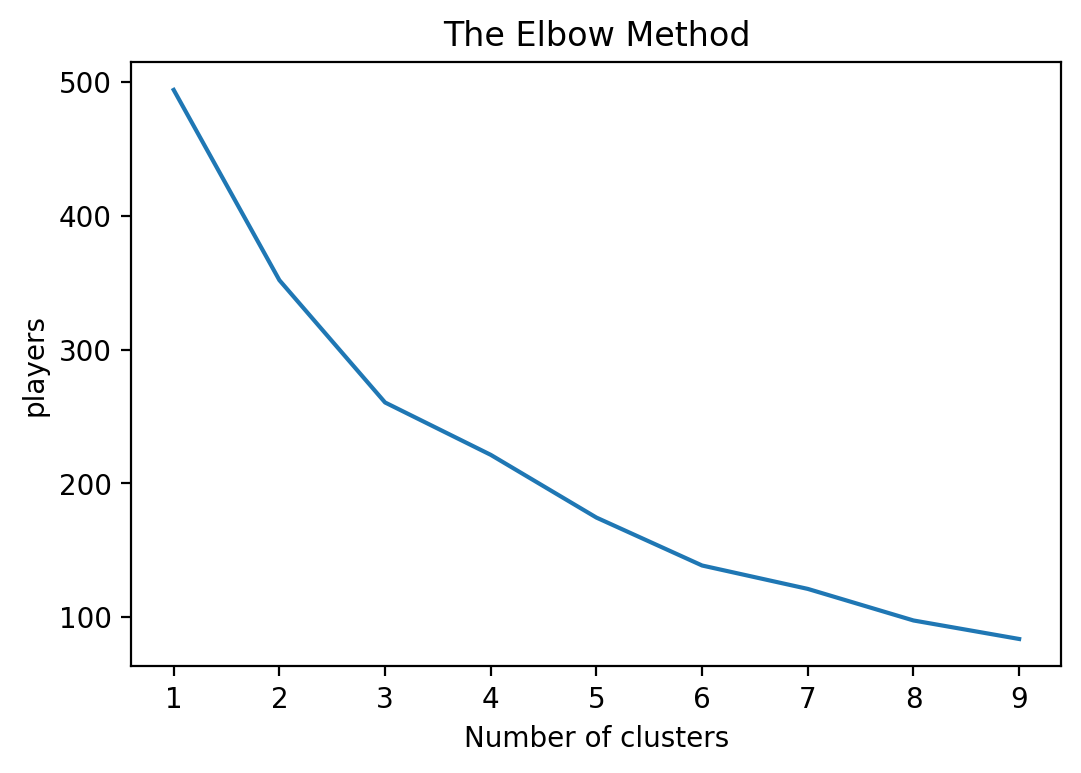

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1])

In [28]:
kmeans.cluster_centers_

array([[-0.74145737, -0.59630271, -0.58740247, -0.54356447, -0.48358292,
        -0.42962566, -0.5187214 , -0.03380358, -0.4330127 , -0.4031904 ,
        -0.27110883, -0.52949099, -0.27227775, -0.04128608, -0.74145737,
        -0.36047354, -0.3211635 , -0.07853587, -0.30389959, -0.36050854,
         0.04065459,  0.04029858,  0.09141961, -0.36860489,  0.        ,
        -0.3841393 , -0.23570226],
       [ 1.06465674,  0.45762766,  1.25226462, -0.33745695, -0.29881358,
        -0.19622462, -0.32089171, -0.06517965, -0.4330127 , -0.55339859,
         0.95533589, -0.39463403,  0.08626622,  0.10133856,  1.06465674,
         1.43678108,  1.31012472,  0.49538012,  1.28939295,  1.20324072,
         0.59714479,  0.82513193,  0.46498478,  1.03209369,  0.        ,
         0.16245539, -0.23570226],
       [ 0.52282251,  0.9187222 , -0.09682458,  1.78073237,  1.58247427,
         1.31934491,  1.69791813,  0.1659835 ,  1.62379763,  1.69972424,
        -0.51639778,  1.81702001,  0.57286161, -0.0234

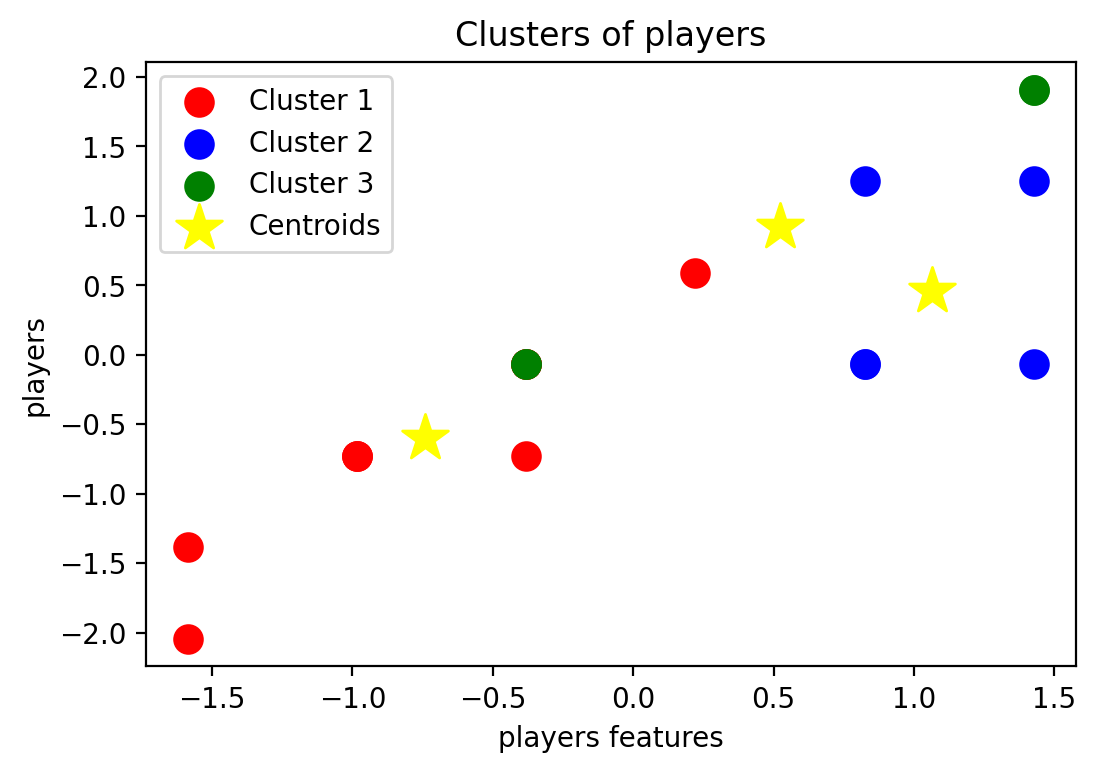

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
WestIndies_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),2,2,0,54,37,27.00,29,186.20,0,...,37,0,-,-,6.16,-,0,0,1,0
1,SW Ambris (WI),4,4,0,86,60,21.50,106,81.13,0,...,-,-,-,-,-,-,-,-,0,0
2,DM Bravo (WI),3,3,0,63,39,21.00,87,72.41,0,...,-,-,-,-,-,-,-,-,1,0
3,RL Chase (WI),5,5,1,82,41,20.50,104,78.84,0,...,208,4,2/53,52.00,4.95,63.0,0,0,3,0
4,SS Cottrell (WI),5,3,3,8,7*,-,9,88.88,0,...,284,10,4/67,28.40,5.79,29.4,1,0,1,0
5,WIA Fernando (SL),3,3,0,206,127,68.66,212,97.16,1,...,-,-,-,-,-,-,-,-,0,0
6,SO Hetmyer (WI),2,2,0,14,8,7.00,15,93.33,0,...,-,-,-,-,-,-,-,-,0,0
7,JO Holder (WI),3,3,0,23,12,7.66,24,95.83,0,...,171,3,2/68,57.00,6.10,56.0,0,0,0,0
8,SD Hope (WI),6,6,0,282,115,47.00,376,75.00,1,...,-,-,-,-,-,-,-,-,14,1
9,AS Joseph (WI),6,3,1,16,16,8.00,31,51.61,0,...,265,18,4/32,14.72,4.41,20.0,3,0,3,0


In [31]:
WestIndies_2020["cluster"] = y_kmeans

In [32]:
WestIndies_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,FA Allen (WI),2,2,0,54,37,27.00,29,186.20,0,...,0,-,-,6.16,-,0,0,1,0,0
1,SW Ambris (WI),4,4,0,86,60,21.50,106,81.13,0,...,-,-,-,-,-,-,-,0,0,0
2,DM Bravo (WI),3,3,0,63,39,21.00,87,72.41,0,...,-,-,-,-,-,-,-,1,0,0
3,RL Chase (WI),5,5,1,82,41,20.50,104,78.84,0,...,4,2/53,52.00,4.95,63.0,0,0,3,0,1
4,SS Cottrell (WI),5,3,3,8,7*,-,9,88.88,0,...,10,4/67,28.40,5.79,29.4,1,0,1,0,1
5,WIA Fernando (SL),3,3,0,206,127,68.66,212,97.16,1,...,-,-,-,-,-,-,-,0,0,2
6,SO Hetmyer (WI),2,2,0,14,8,7.00,15,93.33,0,...,-,-,-,-,-,-,-,0,0,0
7,JO Holder (WI),3,3,0,23,12,7.66,24,95.83,0,...,3,2/68,57.00,6.10,56.0,0,0,0,0,0
8,SD Hope (WI),6,6,0,282,115,47.00,376,75.00,1,...,-,-,-,-,-,-,-,14,1,2
9,AS Joseph (WI),6,3,1,16,16,8.00,31,51.61,0,...,18,4/32,14.72,4.41,20.0,3,0,3,0,1


In [33]:
WestIndies_2020['cluster'].value_counts()

0    10
1     5
2     4
Name: cluster, dtype: int64

In [34]:
WestIndies_Cluster_2020 = np.array([10,5,4])

In [35]:
WestIndies_Cluster_2020

array([10,  5,  4])

In [36]:
%store WestIndies_Cluster_2020

Stored 'WestIndies_Cluster_2020' (ndarray)


In [37]:
WestIndies_2020_players_scaled.insert(0, 'Player', WestIndies_2020.Player)

In [38]:
WestIndies_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),-0.982273,-0.728044,-0.710047,-0.342423,-0.153238,-0.092507,-0.672355,2.922471,-0.433013,...,-0.422885,-0.458980,-0.602780,-0.848067,1.137591,-0.809780,-0.368605,0.0,-0.287681,-0.235702
1,SW Ambris (WI),0.221803,0.589369,-0.710047,0.054892,0.490655,-0.296238,0.137905,-0.121558,-0.433013,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,-0.609208,-0.235702
2,DM Bravo (WI),-0.380235,-0.069338,-0.710047,-0.230678,-0.097247,-0.314759,-0.062029,-0.374189,-0.433013,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,-0.287681,-0.235702
3,RL Chase (WI),0.823842,1.248075,0.516398,0.005228,-0.041256,-0.333280,0.116859,-0.187903,-0.433013,...,-0.422885,1.357373,0.278206,1.064270,0.691747,1.089704,-0.368605,0.0,0.355371,-0.235702
4,SS Cottrell (WI),0.823842,-0.069338,2.969287,-0.913565,-0.993098,-1.092639,-0.882812,0.102971,-0.433013,...,1.872778,2.164642,1.599684,0.196363,1.001259,0.076646,1.032094,0.0,-0.287681,-0.235702
5,WIA Fernando (SL),-0.380235,-0.069338,-0.710047,1.544826,2.366344,1.450658,1.253327,0.342854,2.309401,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,-0.609208,-0.235702
6,SO Hetmyer (WI),-0.982273,-0.728044,-0.710047,-0.839068,-0.965103,-0.833345,-0.819675,0.231894,-0.433013,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,-0.609208,-0.235702
7,JO Holder (WI),-0.380235,-0.069338,-0.710047,-0.727323,-0.853122,-0.808898,-0.724969,0.304322,-0.433013,...,-0.422885,0.964361,0.057960,1.248149,1.115483,0.878650,-0.368605,0.0,-0.609208,-0.235702
8,SD Hope (WI),1.425880,1.906782,-0.710047,2.488451,2.030400,0.648331,2.979076,-0.299153,2.309401,...,-0.422885,-0.851992,-0.602780,-0.848067,-1.132161,-0.809780,-0.368605,0.0,3.892160,4.242641
9,AS Joseph (WI),1.425880,-0.069338,0.516398,-0.814236,-0.741140,-0.796303,-0.651309,-0.976795,-0.433013,...,1.872778,1.962825,3.361655,-0.306729,0.492775,-0.206769,3.833491,0.0,0.355371,-0.235702


In [39]:
WestIndies_2020_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,FA Allen (WI),-0.092507,-0.848067
1,SW Ambris (WI),-0.296238,-0.848067
2,DM Bravo (WI),-0.314759,-0.848067
3,RL Chase (WI),-0.333280,1.064270
4,SS Cottrell (WI),-1.092639,0.196363
5,WIA Fernando (SL),1.450658,-0.848067
6,SO Hetmyer (WI),-0.833345,-0.848067
7,JO Holder (WI),-0.808898,1.248149
8,SD Hope (WI),0.648331,-0.848067
9,AS Joseph (WI),-0.796303,-0.306729


In [40]:
WestIndies_2020_Ave=WestIndies_2020_players_scaled.mean()

In [41]:
WestIndies_2020_Ave

Mat_x          -1.577685e-16
Inns_x          5.916320e-17
NO             -3.505967e-17
Runs_x         -2.191230e-17
HS             -3.652049e-18
Ave_x          -1.402387e-16
BF              4.090295e-17
SR_x            4.108556e-16
100             2.921640e-17
50             -2.337312e-17
0               4.674623e-17
4s             -2.337312e-17
6s              2.629476e-17
Unnamed: 0_y   -7.011935e-17
Mat_y          -1.577685e-16
Inns_y          2.337312e-17
Overs          -3.505967e-17
Mdns            1.752984e-17
Runs_y         -1.110223e-16
Wkts            0.000000e+00
Ave_y          -1.899066e-17
Econ           -1.168656e-17
SR_y           -2.204925e-17
4               2.337312e-17
5               0.000000e+00
Ct              4.674623e-17
St             -2.921640e-18
dtype: float64

In [42]:
WestIndies_Ave_2020 =WestIndies_2020_Ave[['Ave_x','Ave_y']]

In [43]:
WestIndies_Ave_2020

Ave_x   -1.402387e-16
Ave_y   -1.899066e-17
dtype: float64

In [44]:
WestIndies_Ave_2020 = np.array([WestIndies_Ave_2020.Ave_x, WestIndies_Ave_2020.Ave_y])

In [45]:
WestIndies_Ave_2020

array([-1.40238698e-16, -1.89906570e-17])

In [46]:
%store WestIndies_Ave_2020

Stored 'WestIndies_Ave_2020' (ndarray)


In [47]:
WestIndies_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,FA Allen (WI),2,2,0,54,37,27.00,29,186.20,0,...,0,-,-,6.16,-,0,0,1,0,0
1,SW Ambris (WI),4,4,0,86,60,21.50,106,81.13,0,...,-,-,-,-,-,-,-,0,0,0
2,DM Bravo (WI),3,3,0,63,39,21.00,87,72.41,0,...,-,-,-,-,-,-,-,1,0,0
3,RL Chase (WI),5,5,1,82,41,20.50,104,78.84,0,...,4,2/53,52.00,4.95,63.0,0,0,3,0,1
4,SS Cottrell (WI),5,3,3,8,7*,-,9,88.88,0,...,10,4/67,28.40,5.79,29.4,1,0,1,0,1
5,WIA Fernando (SL),3,3,0,206,127,68.66,212,97.16,1,...,-,-,-,-,-,-,-,0,0,2
6,SO Hetmyer (WI),2,2,0,14,8,7.00,15,93.33,0,...,-,-,-,-,-,-,-,0,0,0
7,JO Holder (WI),3,3,0,23,12,7.66,24,95.83,0,...,3,2/68,57.00,6.10,56.0,0,0,0,0,0
8,SD Hope (WI),6,6,0,282,115,47.00,376,75.00,1,...,-,-,-,-,-,-,-,14,1,2
9,AS Joseph (WI),6,3,1,16,16,8.00,31,51.61,0,...,18,4/32,14.72,4.41,20.0,3,0,3,0,1
